<font size="5">Predicting The Costs Of Used Cars -  By Imarticus Learning</font>




<font size="5">Dataset</font>

The dataset has been downloaded from Kaggle's website using the hackathon's link https://www.machinehack.com/course/predicting-the-costs-of-used-cars-hackathon-by-imarticus/


<font size="5">Problem Statement</font>

 While the future is coming up Driverless cars in present the overall data on sales of automobiles shows a huge drop from the last couple of years.The objective is in knowing the prices of used cars from the given  data collected from various sources and distributed across various locations in India.

<font size="5">Project Implementation:</font>


The idea behind this project is to develop a model that will help the new users estimate the correct price of used cars that should be given with the given related  features.The predictions have been made on the training dataset having 6019 records from the original dataset.

FEATURES:

Name: The brand and model of the car.

Location: The location in which the car is being sold or is available for purchase.

Year: The year or edition of the model.

Kilometers_Driven: The total kilometres driven in the car by the previous owner(s) in KM.

Fuel_Type: The type of fuel used by the car.

Transmission: The type of transmission used by the car.

Owner_Type: Whether the ownership is Firsthand, Second hand or other.

Mileage: The standard mileage offered by the car company in kmpl or km/kg

Engine: The displacement volume of the engine in cc.

Power: The maximum power of the engine in bhp.

Seats: The number of seats in the car.

New_Price: The price of a new car of the same model.

Price: The price of the used car in INR Lakhs.

My Plan of Action:
1. Imported the required libraries and loaded the dataset
2. Checked for the missing data and the descriptive statistics 
3. Visualized the dataset, checked for the correlation among the variables.
4. Dropped the unwanted column.
5. Converted the categorical data into integers.
6. Replaced the missing values,i.e Data imputation
7. Encoded the categorical variables using OneHotEncoder.
8. Splitted the Dataset into Train & test
9. Performed Linear Regression using ScikitLearn package.
10. Evaluated the model on RMSE,MSE,MAE.


<font size="5">Importing Libraries</font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression 
from sklearn import metrics
from sklearn.metrics import mean_squared_error

<font size="5">Loading the Dataset</font>

In [2]:
data=pd.read_excel("E:\Dataset\Cost of used cars_Data_Train.xlsx")

In [3]:
#Checking the number of rows and columns in the dataset
data.shape

(6019, 13)

In [4]:
# To see first 5 observations (rows) of your data
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [5]:
#Checking the data types of each feature
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
Name                 6019 non-null object
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage              6017 non-null object
Engine               5983 non-null object
Power                5983 non-null object
Seats                5977 non-null float64
New_Price            824 non-null object
Price                6019 non-null float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


<font size="5">Exploratory data analysis</font>

In [6]:
#Checking for missing values in the dataset 
data.isnull().values.any()

True

In [7]:
#Checking the total number of missing values in the dataset
data.isnull().values.sum()

5311

In [8]:
#Checking for missing values for each features
data.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [9]:
#Checking features or columns of the dataset
data.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

In [10]:
#Checking the descriptive statistics 
data.describe(include='all')

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
count,6019,6019,6019.000000,6.019000e+03,6019,6019,6019,6017,5983,5983,5977.000000,824,6019.000000
unique,1876,11,NaN,NaN,5,2,4,442,146,372,NaN,540,NaN
top,Mahindra XUV500 W8 2WD,Mumbai,NaN,NaN,Diesel,Manual,First,17.0 kmpl,1197 CC,74 bhp,NaN,95.13 Lakh,NaN
freq,49,790,NaN,NaN,3205,4299,4929,172,606,235,NaN,6,NaN
mean,NaN,NaN,2013.358199,5.873838e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.278735,NaN,9.479468
std,NaN,NaN,3.269742,9.126884e+04,NaN,NaN,NaN,NaN,NaN,NaN,0.808840,NaN,11.187917
min,NaN,NaN,1998.000000,1.710000e+02,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.440000
25%,NaN,NaN,2011.000000,3.400000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,3.500000
50%,NaN,NaN,2014.000000,5.300000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,5.640000
75%,NaN,NaN,2016.000000,7.300000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,9.950000


<font size="5">Visualizing the dataset </font>


C:\Users\DELL\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\DELL\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


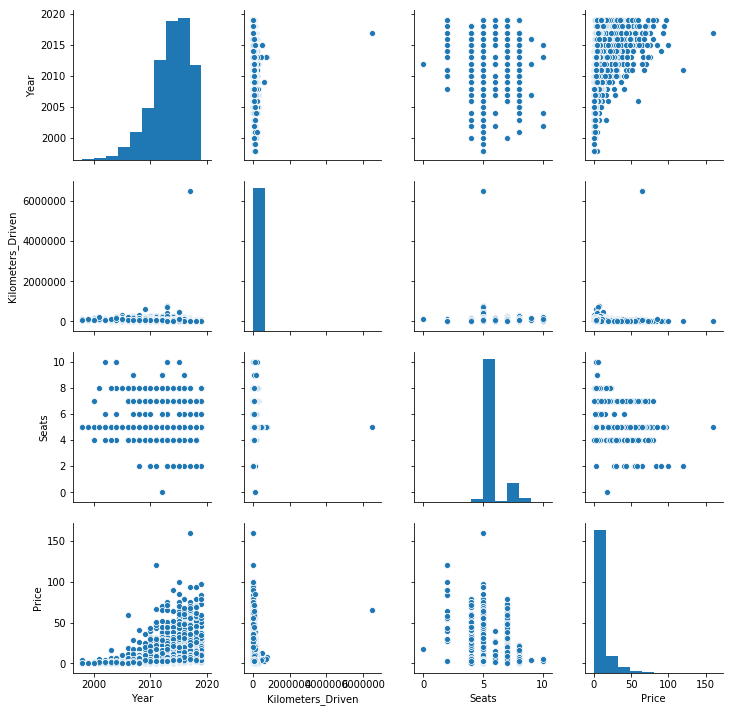

In [11]:
#Univariate Distribution of the variables
sns.pairplot(data)

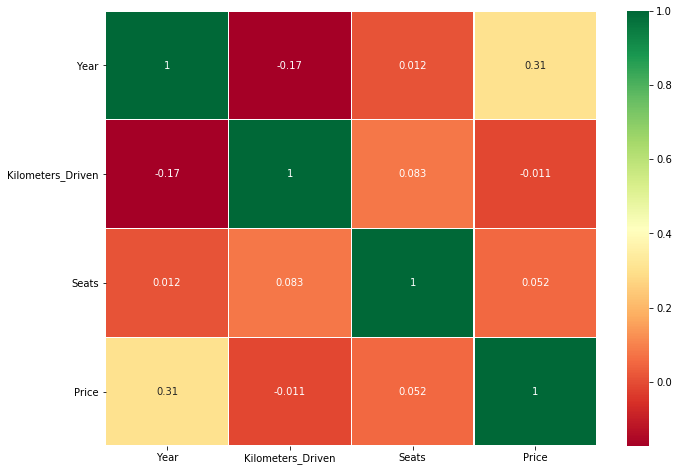

In [12]:
#Creating a heatmap to check the correlation between the variables
sns.heatmap(data.corr(method='pearson'), annot=True, cmap= 'RdYlGn', linewidths= 0.2)
fig= plt.gcf()
fig.set_size_inches(11,8)
plt.show()

The feature price has strong correlation with Year,Kilometres_Driven,Seats

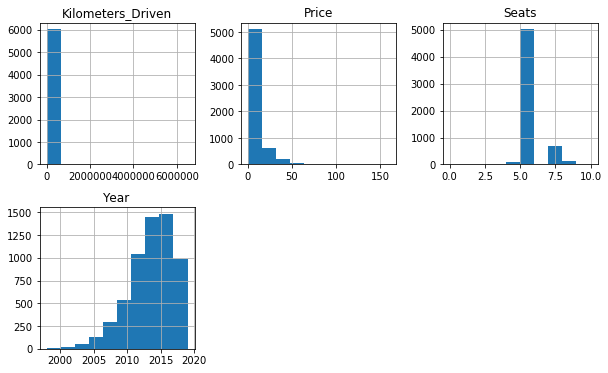

In [13]:
#Checking the distribution for each variable
data.hist(layout = (2, 3), figsize = (10, 6))
plt.show()

<font size="5">Dropping unwanted columns</font>

In [14]:
##Dropping the feature New_Price as it contains a large number of missing values.
data = data.drop(columns=['New_Price'])

In [15]:
data.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

<font size="5">Data Cleaning & Preparation</font>

In [16]:
#Feature/Column : Name
#Splitting name into 2 features, brand and model
names = list(data.Name)
brand = []
model = []
for i in range(len(names)):
    try:
        brand.append(names[i].split(" ")[0].strip())
        try:
            model.append(" ".join(names[i].split(" ")[1:]).strip())
        except:
            pass
    except:
        print("ERR ! - ", names[i], "@" , i)
data["Brand"] =  brand
data["Model"] = model
data.drop(labels = ['Name'], axis = 1, inplace = True)

In [17]:
#Feature/Column : Mileage
#Removing the  texts and converting to integer
mileage = list(data.Mileage)
for i in range(len(mileage)):
    try :
        mileage[i] = float(mileage[i].split(" ")[0].strip())
    except:
        mileage[i] = np.nan
data['Mileage'] = mileage

In [18]:
#Feature/Column : Engine
#Removing the  texts and converting to integer
engine = list(data.Engine)
for i in range(len(engine)):
    try :
        engine[i] = int(engine[i].split(" ")[0].strip())
    except:
        engine[i] = np.nan
data['Engine'] = engine

In [19]:
#Feature/Column : Power
#Removing the  texts and converting to integer
power = list(data.Power)
for i in range(len(power)):
    try :
        power[i] = float(power[i].split(" ")[0].strip())
    except:
        power[i] = np.nan
data['Power'] = power

In [20]:
#Re-ordering the columns
data = data[['Brand', 'Model', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
      'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']]

In [21]:
data.head()

,Brand,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai,Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda,Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti,Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi,A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [22]:
data.isnull().sum()

Brand                  0
Model                  0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                36
Power                143
Seats                 42
Price                  0
dtype: int64

<font size="5">Data Imputation</font>

In [23]:
#Using inbuilt method
data.Seats= data.Seats.replace(np.nan, np.nanmedian(data.Seats), regex= True) #Perfoming Data imputation in Seats column
data.Mileage= data.Mileage.replace(np.nan, np.nanmedian(data.Mileage), regex= True) #Perfoming Data imputation in Mileage column
data.Engine= data.Engine.replace(np.nan, np.nanmedian(data.Engine), regex= True) #Perfoming Data imputation in Engine column
data.Power= data.Power.replace(np.nan, np.nanmedian(data.Power), regex= True) #Perfoming Data imputation in Power column

In [24]:
data.isnull().sum() #making sure that there are no null values.

Brand                0
Model                0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [25]:
#Assigning values to the variables
Y =data.Price
features= ['Brand','Model','Location','Fuel_Type','Owner_Type','Kilometers_Driven','Seats','Mileage']
X=data[features]

In [26]:
X.head()

,Brand,Model,Location,Fuel_Type,Owner_Type,Kilometers_Driven,Seats,Mileage
0,Maruti,Wagon R LXI CNG,Mumbai,CNG,First,72000,5.0,26.60
1,Hyundai,Creta 1.6 CRDi SX Option,Pune,Diesel,First,41000,5.0,19.67
2,Honda,Jazz V,Chennai,Petrol,First,46000,5.0,18.20
3,Maruti,Ertiga VDI,Chennai,Diesel,First,87000,7.0,20.77
4,Audi,A4 New 2.0 TDI Multitronic,Coimbatore,Diesel,Second,40670,5.0,15.20


<font size="5">Encoding the categorical variable</font>

In [27]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()
X_new=encoder.fit_transform(X)

<font size="5">Splitting the data into Train_Test_Split</font>

In [28]:
from sklearn.model_selection import train_test_split

#Splitting the training set into Training and Testing sets
seed = 10
test_size = 0.3
X_train, X_test, Y_train, Y_test = train_test_split(X_new,Y, test_size = test_size, random_state = seed) 

<font size="5">Linear model using ScikitLearn Package</font>

In [30]:
#Fitting the Linear Regression model
lm=LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [31]:
# To get model parameters, intercept and coefficient:
print(lm.coef_ , lm.intercept_)

[-4.53523579  8.81729958 11.53991764 ... -3.01274934 -4.74325037
 -0.36487252] 9.516446712556375


In [32]:
#Prediction on Test and Train set
#Calculation of  Root Mean Squared Error(RMSE) 

yp_test = lm.predict(X_test)
yp_train = lm.predict(X_train)
train_mse = np.mean((Y_train-yp_train)**2)
test_mse = np.mean((Y_test-yp_test)**2)
print("Linear Regression Train RMSE: ", np.sqrt(train_mse))
print( "Linear Regression Test RMSE: ", np.sqrt(test_mse))

Linear Regression Train RMSE:  1.1944161293624151
Linear Regression Test RMSE:  5.5399826641142305


In [33]:
#Calculation of Mean Squared Error (MSE)
train_mse = np.mean((Y_train-yp_train)**2)
test_mse = np.mean((Y_test-yp_test)**2)
print(train_mse)
print(test_mse)

1.4266298900810939
30.69140791868621


In [34]:
#Calculation of Mean Absolute Error(MAE)
print('Train Mean Absolute Error:', metrics.mean_absolute_error(Y_test, yp_test)) 
print('Train Mean Absolute Error:', metrics.mean_absolute_error(Y_train, yp_train)) 

Train Mean Absolute Error: 3.2856827960411583
Train Mean Absolute Error: 0.42546757778918726


In [35]:
#Predicting the Score (% Accuracy)
print('Train Score :', lm.score(X_train,Y_train))
print('Test Score:', lm.score(X_test,Y_test))

Train Score : 0.9892663060519612
Test Score: 0.7132433801338529
